Importing Libraries 

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [218]:
os.chdir(r"D:\KAGGLE DS\Healthcare dataset")
raw_data=pd.read_csv('healthcare_dataset.csv')
data=raw_data.copy()
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [219]:
df=data.copy()
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [221]:
df.isnull().count()

Name                  55500
Age                   55500
Gender                55500
Blood Type            55500
Medical Condition     55500
Date of Admission     55500
Doctor                55500
Hospital              55500
Insurance Provider    55500
Billing Amount        55500
Room Number           55500
Admission Type        55500
Discharge Date        55500
Medication            55500
Test Results          55500
dtype: int64

We found that there are nonull values so data cleaning not required. Therreby starting with EDA

<h1>Exploratory data analysis</h1>

In [224]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [225]:
gender_df=df['Gender']
gendf=pd.DataFrame(gender_df)
gendf['Gender'].astype(str)
gendf['Gender'] = gendf['Gender'].map({'Male': 0, 'Female': 1})
gendf.head()

,Gender
0,0
1,0
2,1
3,1
4,1


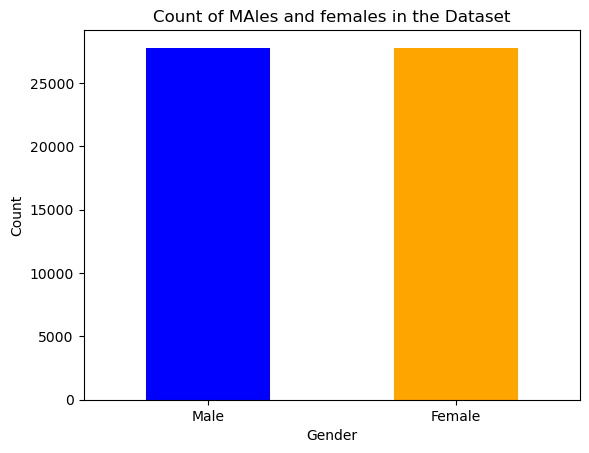

In [226]:
gendf['Gender'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of MAles and females in the Dataset')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.show()

Fropm the above Bar plot we found that there are 27774 Males 27726 Females

In [228]:
df['Blood Type'].unique()

array(['B-', 'A+', 'A-', 'O+', 'AB+', 'AB-', 'B+', 'O-'], dtype=object)

In [229]:
bloodgrp = pd.DataFrame({
    "Bloot Type": df['Blood Type'].unique(),
    "values": df['Blood Type'].value_counts().values
})
bloodgrp

,Bloot Type,values
0,B-,6969
1,A+,6956
2,A-,6947
3,O+,6945
4,AB+,6945
5,AB-,6944
6,B+,6917
7,O-,6877


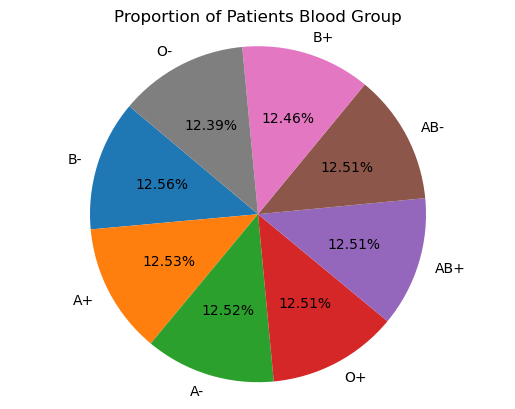

  Bloot Type  values
0         B-    6969
1         A+    6956
2         A-    6947
3         O+    6945
4        AB+    6945
5        AB-    6944
6         B+    6917
7         O-    6877


In [230]:
plt.pie(bloodgrp['values'], labels = bloodgrp['Bloot Type'],autopct='%1.2f%%', startangle=140)
plt.title('Proportion of Patients Blood Group')
plt.axis('equal')
plt.show()
print(bloodgrp)

In [231]:
df['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [232]:
namedf=df[['Name','Medical Condition']]
namedf.insert(0, 'Serial No.', range(1, len(df) + 1))
namedf['Name'] = namedf['Name'].str.title()
namedf.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_4504\1360860498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  namedf['Name'] = namedf['Name'].str.title()


,Serial No.,Name,Medical Condition
0,1,Bobby Jackson,Cancer
1,2,Leslie Terry,Obesity
2,3,Danny Smith,Obesity
3,4,Andrew Watts,Diabetes
4,5,Adrienne Bell,Cancer


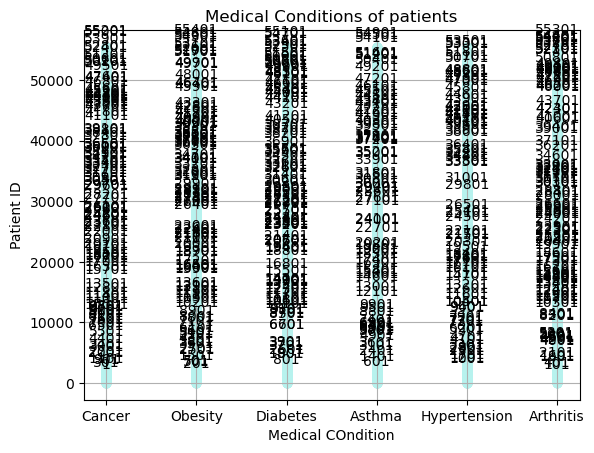

In [233]:
plt.scatter(namedf['Medical Condition'],namedf['Serial No.'], marker='o',c='#B7F2EE')
for i, row in namedf.iloc[::100].iterrows():
    plt.annotate(row['Serial No.'], (row['Medical Condition'], row['Serial No.']), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Medical Conditions of patients')
plt.xlabel('Medical COndition')
plt.ylabel('Patient ID')
plt.grid(True)
plt.show()

THe plot above give details of the patient having particular disease

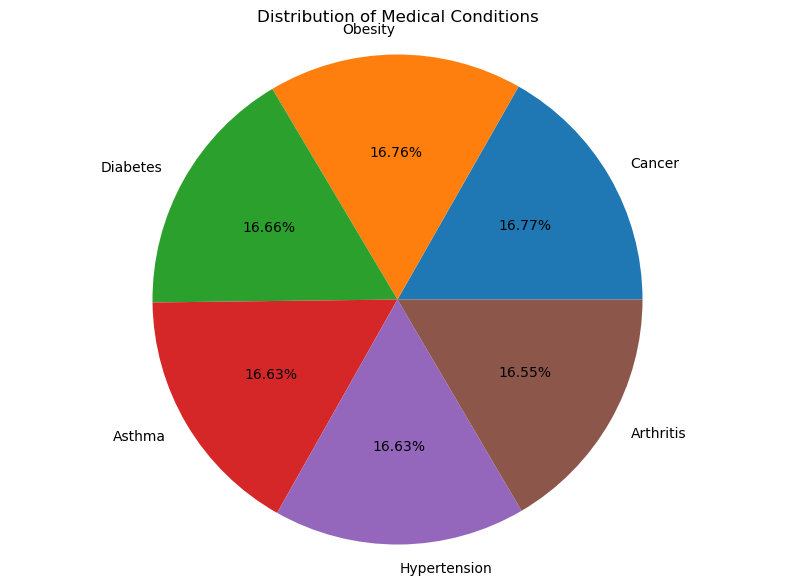

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64


In [235]:
condition_counts = namedf['Medical Condition'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(condition_counts, labels=namedf['Medical Condition'].unique(), autopct='%1.2f%%')
plt.title('Distribution of Medical Conditions')
plt.axis('equal')
plt.show()
print(condition_counts)

Plot giving distribution of various medical conditions

The plot above shows How many patients in a Hospital

In [238]:
hspspeciality=df['Medical Condition']
hspspeciality=pd.DataFrame(hspspeciality,columns=['Medical Condition'])
hspspeciality['Hospital']=df['Hospital']
hspspeciality.head()

,Medical Condition,Hospital
0,Cancer,Sons and Miller
1,Obesity,Kim Inc
2,Obesity,Cook PLC
3,Diabetes,"Hernandez Rogers and Vang,"
4,Cancer,White-White


In [239]:
df['Insurance Provider'].unique()

array(['Blue Cross', 'Medicare', 'Aetna', 'UnitedHealthcare', 'Cigna'],
      dtype=object)

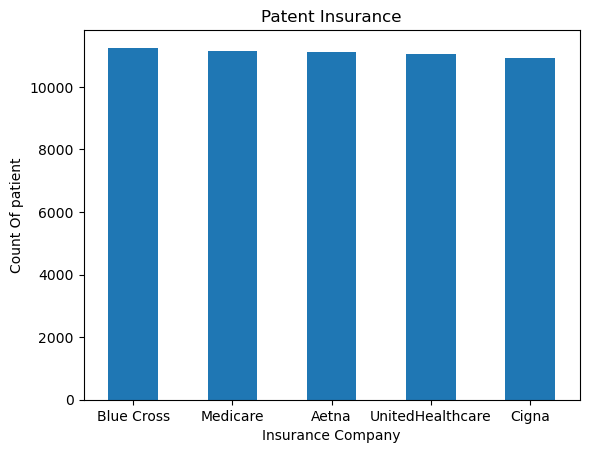

In [240]:
df['Insurance Provider'].value_counts().plot(kind='bar')
plt.xlabel('Insurance Company')
plt.ylabel('Count Of patient')
plt.title('Patent Insurance')
plt.xticks(ticks=[0, 1,2,3,4], labels=['Blue Cross', 'Medicare', 'Aetna', 'UnitedHealthcare', 'Cigna'], rotation=0)
plt.show()

The plot above count of patients registered with different insurance company

In [242]:
ins = df[['Insurance Provider']].copy()
ins['Insurance Provider'] = ins['Insurance Provider'].astype(str)
ins.head()

,Insurance Provider
0,Blue Cross
1,Medicare
2,Aetna
3,Medicare
4,Aetna


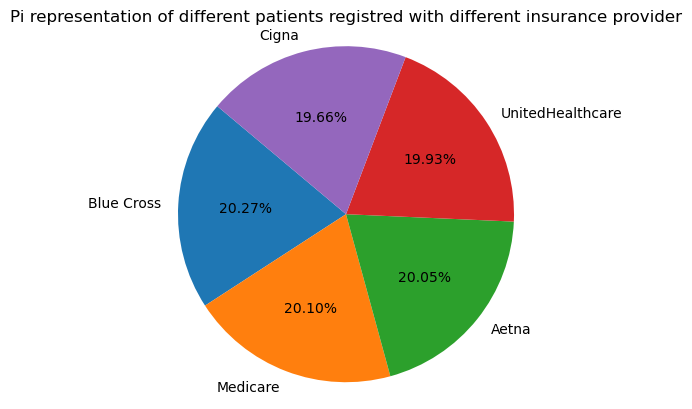

Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64


In [243]:
condition_counts = ins['Insurance Provider'].value_counts()
plt.pie(condition_counts, labels=ins['Insurance Provider'].unique(), autopct='%1.2f%%',startangle=140)
plt.title('Pi representation of different patients registred with different insurance provider')
plt.axis('equal')
plt.show()
print(condition_counts)

The pi grapoh above shows disribution of patient based on insurance provider.Based on above visualization we can say that Blue Cross is the best insurance provider followed by Medicare and Aetna

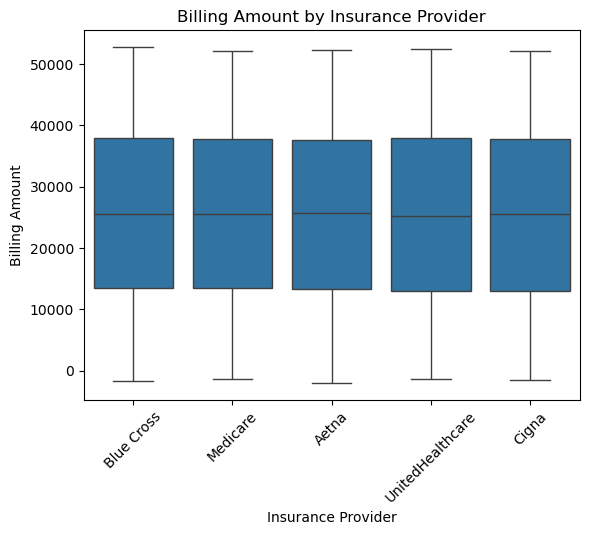

In [245]:
sns.boxplot(x='Insurance Provider', y='Billing Amount', data=df)
plt.title('Billing Amount by Insurance Provider')
plt.xlabel('Insurance Provider')
plt.ylabel('Billing Amount')
plt.xticks(rotation=45)
plt.show()

In [246]:
df[['Hospital','Admission Type']].head()

,Hospital,Admission Type
0,Sons and Miller,Urgent
1,Kim Inc,Emergency
2,Cook PLC,Emergency
3,"Hernandez Rogers and Vang,",Elective
4,White-White,Urgent


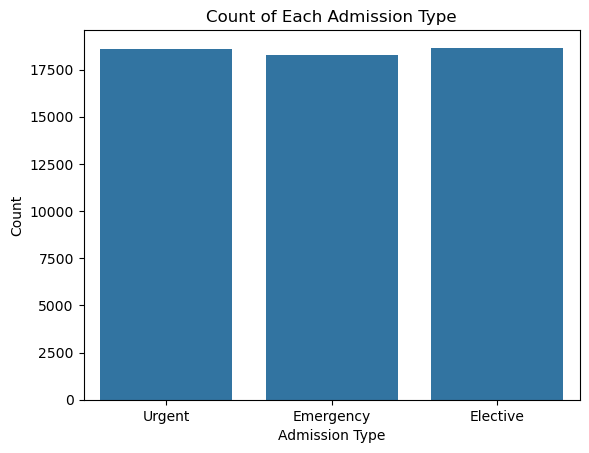

In [247]:
sns.countplot(x='Admission Type', data=df)
plt.title('Count of Each Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.show()

The plot above will give distribution for each hospital

In [249]:
treatment=df[['Medical Condition','Medication']].copy()
treatment.head()

,Medical Condition,Medication
0,Cancer,Paracetamol
1,Obesity,Ibuprofen
2,Obesity,Aspirin
3,Diabetes,Ibuprofen
4,Cancer,Penicillin


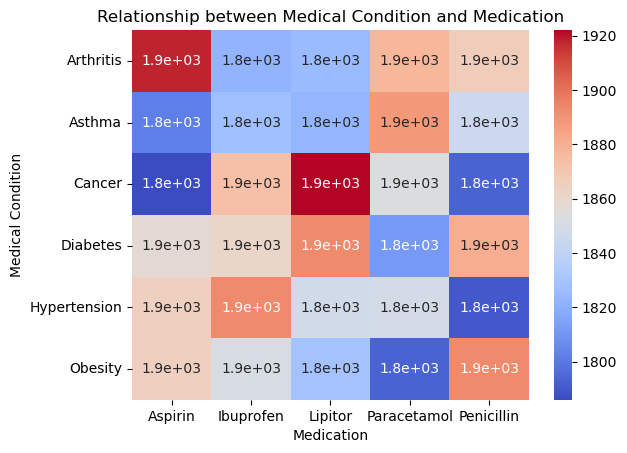

Medication         Aspirin  Ibuprofen  Lipitor  Paracetamol  Penicillin
Medical Condition                                                      
Arthritis             1918       1822     1825         1877        1866
Asthma                1802       1827     1823         1888        1845
Cancer                1786       1873     1922         1853        1793
Diabetes              1858       1861     1893         1811        1881
Hypertension          1865       1893     1848         1849        1790
Obesity               1865       1851     1829         1793        1893


In [250]:
contingency_table = pd.crosstab(treatment['Medical Condition'], treatment['Medication'])
sns.heatmap(contingency_table, annot=True, cmap='coolwarm')
plt.title('Relationship between Medical Condition and Medication')
plt.show()
print(contingency_table)

The numbers across the table are relatively close to each other, indicating that no single medication is overwhelmingly used more or less than the others for any specific condition. This suggests a somewhat even distribution of medication usage across different medical conditions

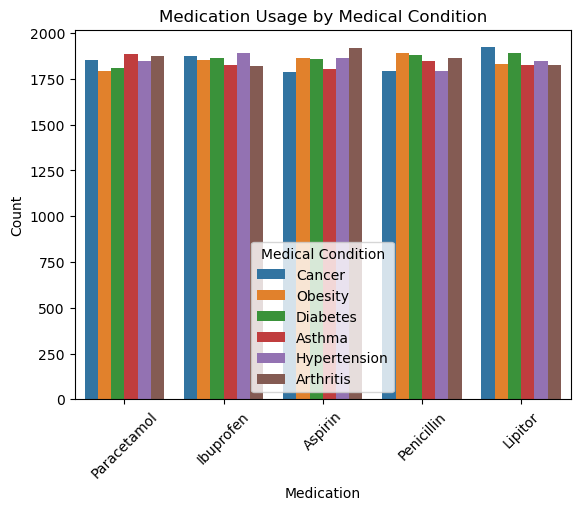

In [252]:
sns.countplot(x='Medication', hue='Medical Condition', data=df)
plt.title('Medication Usage by Medical Condition')
plt.xlabel('Medication')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

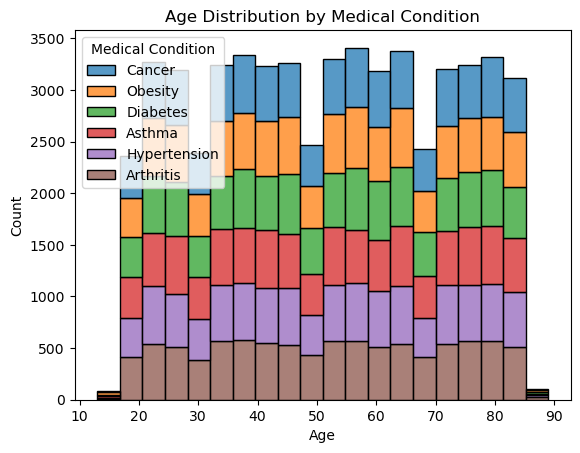

In [253]:
sns.histplot(data=df, x='Age', hue='Medical Condition', multiple='stack', bins=20)
plt.title('Age Distribution by Medical Condition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Plot showing how/type of disease generally found in a particular age group

Aggregate of the billing amounts by hospital and admission type.

In [256]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


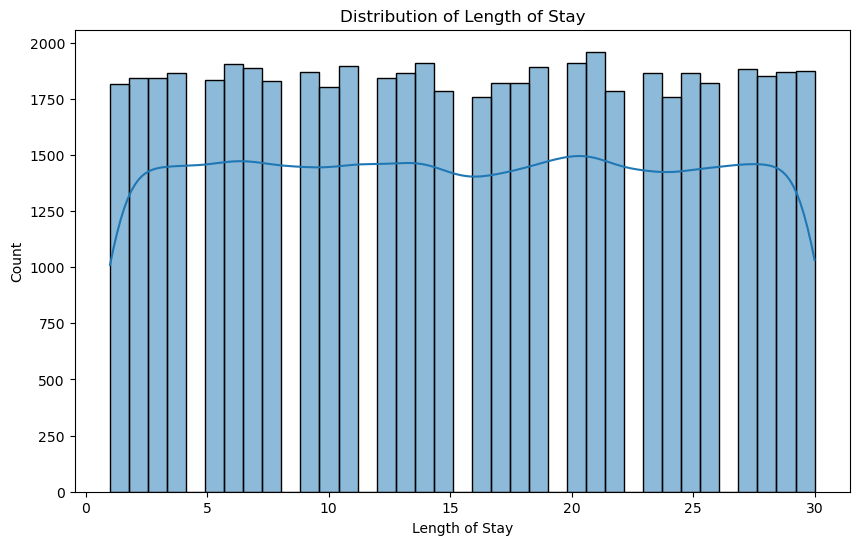

In [257]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
plt.figure(figsize=(10, 6))
sns.histplot(df['Length of Stay'], kde=True)
plt.title('Distribution of Length of Stay')
plt.show()

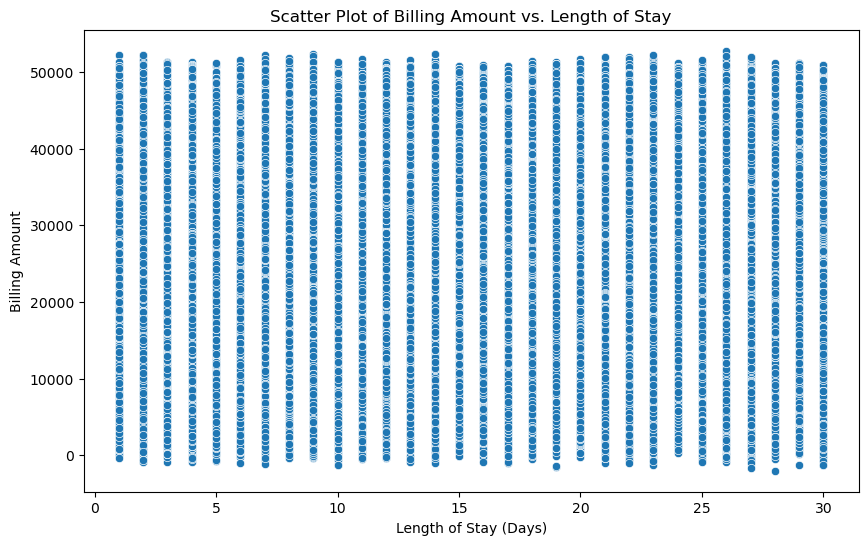

In [258]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Length of Stay', y='Billing Amount', data=df)
plt.title('Scatter Plot of Billing Amount vs. Length of Stay')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Billing Amount')
plt.show()

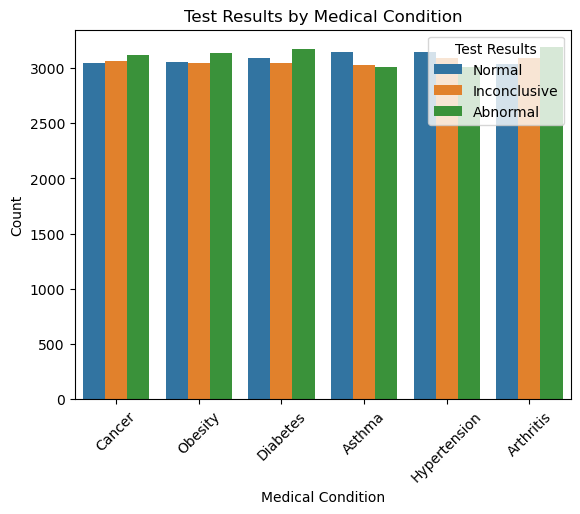

In [259]:
sns.countplot(x='Medical Condition', hue='Test Results', data=df)
plt.title('Test Results by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()